<a href="https://colab.research.google.com/github/Sadiksha08/FDS-Lab-Work/blob/main/FDS_LAB_Practical_7_Data_%26_Sampling_Distributions_and_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data & Sampling Distributions and Inferential Statistics**

In [ ]:
#1. Sampling DistributioN
#(https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%202%20-%20Data%20and%20sampling%20distributions.ipynb)

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
LOANS_INCOME_CSV =pd.read_csv('D:\Python\loans_income.csv')

In [ ]:
LOANS_INCOME_CSV

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
94,69000
95,63800
96,80000
97,77252


In [ ]:
loans_income = pd.read_csv('D:\Python\loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(100),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(100)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(100)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

       income  type
134   55000.0  Data
69    36000.0  Data
135  105000.0  Data
62    34444.0  Data
168  100000.0  Data


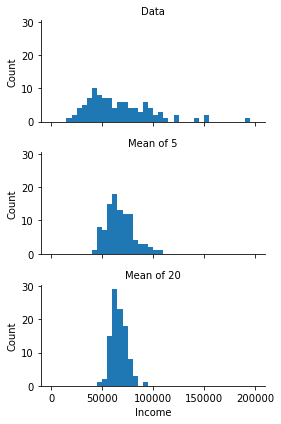

In [ ]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [ ]:
#2. Bootstrap(https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%202%20-%20Data%20and%20sampling%20distributions.ipynb)

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 60000.0
bias: 1387.7280000000028
std. error: 2370.881509301364


4.020422922241316


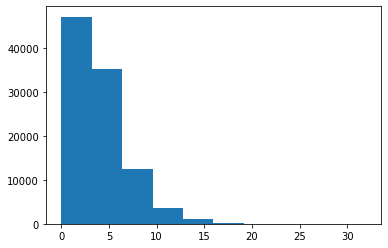

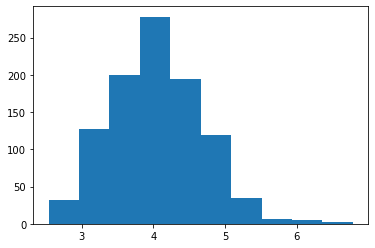

In [ ]:
#3. Central Limit Theorem (https://youtu.be/Ecs_JPe9gCM)
import numpy as np
import random


# Create a parent distribution, from the gamma family
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000)
print(np.mean(s))
import matplotlib.pyplot as plt
import scipy.special as sps
plt.hist(s)
plt.show()


# The distribution of the means from the sampled groups is normally distributed
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]
plt.hist(samples)
plt.show()

In [ ]:
#4. The Law of Large Numbers
#(https://towardsdatascience.com/sampling-distributions-with-python-implementation-3f4555e1d450)
#The law of large numbers states that as a sample size increases, the sample mean will get closer to the population mean. 
#Let’s check this with our example.

#Below is an array that represents the puppies we have in our sample, where 1 
#represents the puppies with blue eyes, and 0 represents the puppies with hazel eyes.

np.random.seed(42)

puppies = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1])


#Let's generate one more sample of size 100.
np.random.choice(puppies, 100, replace=True)



hundred_sample_props= []
for i in range(10000):
    sample = np.random.choice(puppies, 100, replace=True)
    hundred_sample_props.append(sample.mean())
hundred_sample_props = np.array(hundred_sample_props)

np.random.choice(puppies, 5, replace=True).mean()
np.random.choice(puppies, 20, replace=True).mean()
np.random.choice(puppies, 100, replace=True).mean()

0.8

In [ ]:
#5. Plotting Estimates (Mean and Standard Deviation)
#(https://www.geeksforgeeks.org/how-to-plot-mean-and-standard-deviation-in-pandas/)

# Import the necessary libraries to read 
# dataset and work on that 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Make the dataframe for evaluation on Errorbars 
df = pd.DataFrame({ 
    'insert': [0.0, 0.1, 0.3, 0.5, 1.0], 
    'mean': [0.009905, 0.45019, 0.376818, 0.801856, 0.643859], 
    'quality': ['good', 'good', 'poor', 'good', 'poor'],  
    'std': [0.003662, 0.281895, 0.306806, 0.243288, 0.322378]}) 
  
print(df)

   insert      mean quality       std
0     0.0  0.009905    good  0.003662
1     0.1  0.450190    good  0.281895
2     0.3  0.376818    poor  0.306806
3     0.5  0.801856    good  0.243288
4     1.0  0.643859    poor  0.322378


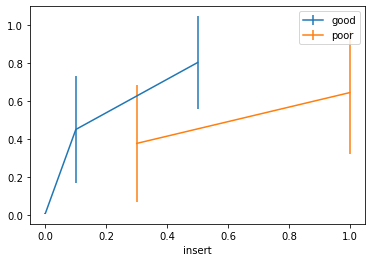

In [ ]:
# Subplots as having two types of quality 
fig, ax = plt.subplots() 
  
for key, group in df.groupby('quality'): 
    group.plot('insert', 'mean', yerr='std',  
               label=key, ax=ax) 
plt.show()

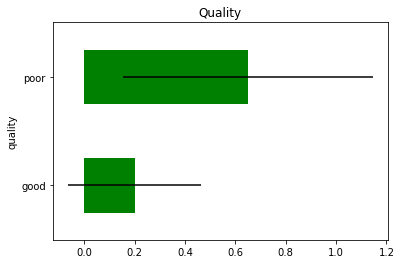

In [ ]:
# Groupby the quality column using aggreate 
# value of mean and std 
qual = df.groupby("quality").agg([np.mean, np.std]) 
qual = qual['insert'] 
qual.plot(kind = "barh", y = "mean", legend = False, 
		xerr = "std", title = "Quality", color='green')

In [ ]:
'''Inferential Statistics

 Calculating Expected Parameters (Mean and
Standard Deviation)
'''

data=pd.read_csv('D:\Python\loans_income.csv')


# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(data)
sample_stdev = np.std(data)
print("mean",sample_mean)
print("standard deviation",sample_stdev)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
#population_model = gaussian_model(data, mu=sample_mean, sigma=sample_stdev)

# Plot the model and data to see how they compare
#fig = plot_data_and_model(data, population_model)

mean 50000    67314.05
dtype: float64
standard deviation 50000    30580.234462
dtype: float64


6.Confidence Interval

A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times. Confidence intervals measure the degree of uncertainty or certainty in a sampling method. 

KEY TAKEAWAYS
A confidence interval displays the probability that a parameter will fall between a pair of values around the mean.
Confidence intervals measure the degree of uncertainty or certainty in a sampling method.
They are most often constructed using confidence levels of 95% or 99%.

# DATA AND SAMPLING DISTRIBUTION

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
data=pd.read_csv("F:/Download/refer_data.csv")

In [ ]:
data.head()

,weight
0,70
1,67
2,57
3,64
4,74


## 1.Sampling Distribution

In [ ]:
data = pd.read_csv("F:/Download/refer_data.csv", squeeze=True)

sample_data = pd.DataFrame({
    'weight': data.sample(100),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'weight': [data.sample(5).mean() for _ in range(100)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'weight': [data.sample(20).mean() for _ in range(100)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

     weight  type
14     57.0  Data
174    34.0  Data
175    62.0  Data
49     65.0  Data
80     58.0  Data


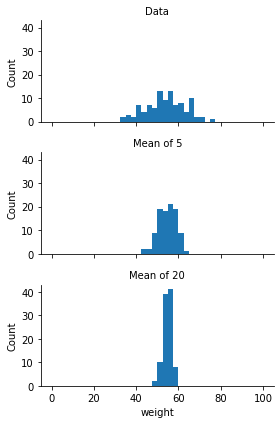

In [ ]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'weight', range=[0, 100], bins=40)
g.set_axis_labels('weight', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## 2. Bootstrap

In [ ]:


results = []
for nrepeat in range(1000):
    sample = resample(data)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {data.median()}')
print(f'bias: {results.mean() - data.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 55.0
bias: 0.029000000000003467
std. error: 1.018919622540077


## 3. Central limit theorem 

4.011340575875756


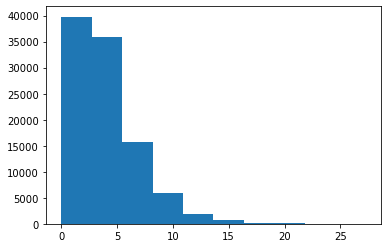

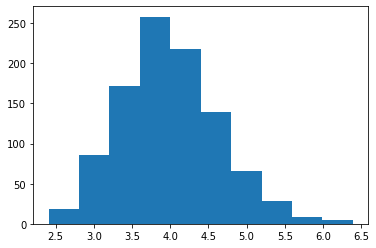

In [ ]:
#3. Central Limit Theorem 
import numpy as np
import random


# Create a parent distribution, from the gamma family
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000)
print(np.mean(s))
import matplotlib.pyplot as plt
import scipy.special as sps
plt.hist(s)
plt.show()


# The distribution of the means from the sampled groups is normally distributed
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]
plt.hist(samples)
plt.show()

## 4. Law of large numbers


In [ ]:
#The Law of Large Numbers

#The law of large numbers states that as a sample size increases, the sample mean will get closer to the population mean. 
#Let’s check this with our example.


# below is an array that represents the students who have passed the examination , where 1 represents the student have passed the examination
#and 0 represents  the student have failed 
np.random.seed(42)

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1])


#Let's generate one more sample of size 100.
np.random.choice(students, 100, replace=True)



hundred_sample_props= []
for i in range(10000):
    sample = np.random.choice(students, 100, replace=True)
    hundred_sample_props.append(sample.mean())
hundred_sample_props = np.array(hundred_sample_props)

np.random.choice(students, 5, replace=True).mean()
np.random.choice(students, 20, replace=True).mean()
np.random.choice(students, 100, replace=True).mean()

0.8

## 5. Plotting Estimates (Mean and Standard Deviation)


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Make the dataframe for evaluation on Errorbars 
df = pd.DataFrame({ 
    'insert': [0.0, 0.1, 0.3, 0.5, 1.0], 
    'mean': [0.009905, 0.45019, 0.376818, 0.801856, 0.643859], 
    'quality': ['good', 'good', 'poor', 'good', 'poor'],  
    'std': [0.003662, 0.281895, 0.306806, 0.243288, 0.322378]}) 
  
print(df)

   insert      mean quality       std
0     0.0  0.009905    good  0.003662
1     0.1  0.450190    good  0.281895
2     0.3  0.376818    poor  0.306806
3     0.5  0.801856    good  0.243288
4     1.0  0.643859    poor  0.322378


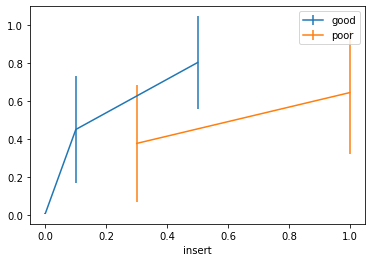

In [ ]:
# Subplots as having two types of quality 
fig, ax = plt.subplots() 
  
for key, group in df.groupby('quality'): 
    group.plot('insert', 'mean', yerr='std',  
               label=key, ax=ax) 
plt.show()

## 6. Defining Confidence Interval

In [ ]:

print(data.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(data, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

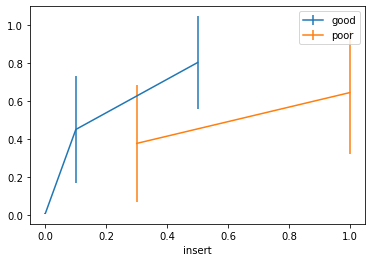

In [ ]:
# Subplots as having two types of quality 
fig, ax = plt.subplots() 
  
for key, group in df.groupby('quality'): 
    group.plot('insert', 'mean', yerr='std',  
               label=key, ax=ax) 
plt.show()

## Inferential statistics

In [ ]:
data=pd.read_csv('F:/Download/refer_data.csv')
# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(data)
sample_stdev = np.std(data)
print("mean",sample_mean)
print("standard deviation",sample_stdev)

mean weight    54.585
dtype: float64
standard deviation weight    9.160392
dtype: float64
